# STUDENT SCORE PREDICTION (REGRESSION)

<b>Introduction:</b>
In this regression problem, we have data containing two features i.e. Hours and Scores. The Hour feature describes the input effort that a student puts in to prepare for his exam. Whereas, the corresponding Scores are outputs that he gets from his efforts. 
It is purely a supervised learning regression problem and for this data, here we are using the simple but yet fast regression algorithm i.e. Linear Support Vector Regressor (LinearSVR).

--------------

<b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import LinearSVR

<b>Loading Data</b>

In [2]:
data = pd.read_csv("student_score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Hours     50 non-null float64
Scores    50 non-null int64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,50.000000,50.000000
mean,5.170000,56.020000
std,2.890537,29.114475
min,0.400000,8.000000
25%,2.700000,31.000000
50%,5.050000,59.000000
75%,7.625000,80.250000
max,11.000000,123.000000


<b>Some Data Visualization</b>

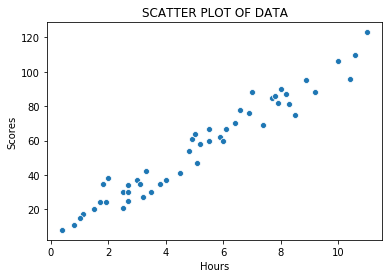

In [5]:
sns.scatterplot(x=data["Hours"], y=data["Scores"])
plt.title("SCATTER PLOT OF DATA")
plt.show()

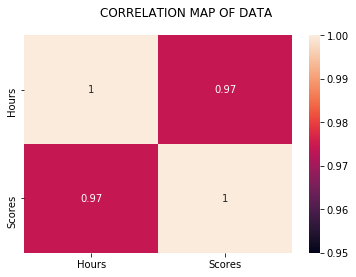

In [6]:
corr = data.corr()

plt.figure(figsize=(6,4))
plt.suptitle("CORRELATION MAP OF DATA")
sns.heatmap(corr, annot=True, vmin=0.95, vmax=1.0)
plt.show()

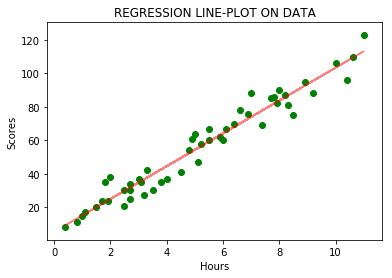

In [7]:
# Plotting Regression Line

fit = np.polyfit(data["Hours"],data["Scores"],1)
m = fit[0]
b = fit[1]

fit_eq = m*data["Hours"] + b

fig = plt.figure()
ax = fig.subplots()
ax.plot(data["Hours"], fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(data["Hours"],data["Scores"], c="g")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("REGRESSION LINE-PLOT ON DATA")
plt.show()

<b>Splitting Data Into Train And Test Sets</b>

In [9]:
X = data["Hours"]
Y = data["Scores"]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.84, random_state=2)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [105]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 1)
(8, 1)
(42,)
(8,)


<b>Building LinearSVR Model And Fitting Train Sets</b>

In [107]:
model = LinearSVR(epsilon=0.3, C=1.3, verbose=5, max_iter=20)

In [108]:
model.fit(x_train,y_train)

[LibLinear]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.3, dual=True, epsilon=0.3, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=20,
     random_state=None, tol=0.0001, verbose=5)

<b>Predicting From Test Sets</b>

In [109]:
y_pred = model.predict(x_test)

<b>Analysing Results And Metrics</b>

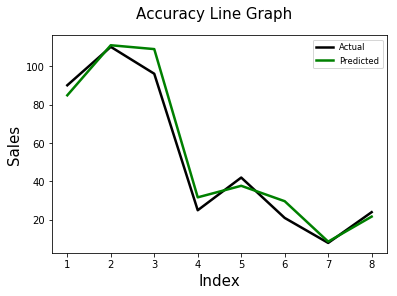

In [110]:
# Plotting Accuracy

c = [i for i in range(1,9)]
fig = plt.figure()
plt.plot(c,y_test, color="k", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="g", linewidth=2.5, linestyle="-")
fig.suptitle("Accuracy Line Graph", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(labels=["Actual","Predicted"], loc=0, fontsize="small")
plt.xticks(np.arange(1,9),c)
plt.show()

Text(0,0.5,'y_test - y_pred')

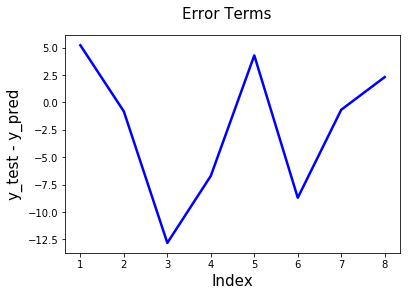

In [111]:
# Plotting Errors

a = [i for i in range(1,9,1)]
fig = plt.figure()
plt.plot(a,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("y_test - y_pred", fontsize=15)

In [112]:
dict_result = {"Actual Y": y_test, "Predicted Y": y_pred}
result = pd.DataFrame(data=dict_result).reset_index(drop=True)
result

,Actual Y,Predicted Y
0,90,84.784253
1,110,110.824082
2,96,108.821018
3,25,31.703064
4,42,37.712255
5,21,29.700000
6,8,8.667831
7,24,21.687745


In [115]:
mse = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:",round(mse,3))
print("Accuracy Score:",round(score*100,2))

Mean Absolute Error: 5.191
Accuracy Score: 97.0


------------

<b>Conclusion:</b>
After the successful creation of our LinearSVR with hyper-parameters as, epsilon = 0.3, C = 1.3, verbose = 5, max_iter = 20, we predicted our test values to get the R2 Score as 0.97 (97%), and Mean-Absolute-Error as 5.191. In the end, we can say that the model is well and good to predict the unseen data. 